In [17]:
using Random
using LinearAlgebra
using Zygote
using Statistics
using Flux
import MLJ
import DataFrames

In [45]:
include("./SVM.jl")
using .svm

In [38]:
X, Y = MLJ.make_blobs(100, 2; centers=2, cluster_std=[1.0, 0.1])
dfBlobs = DataFrames.DataFrame(X)
dfBlobs.y = Y
first(dfBlobs, 5)

Row,x1,x2,y
,Float64,Float64,Cat…
1,0.689581,6.16723,2
2,0.798824,6.35842,2
3,0.618089,6.23425,2
4,0.656492,6.26835,2
5,0.773744,5.93157,2


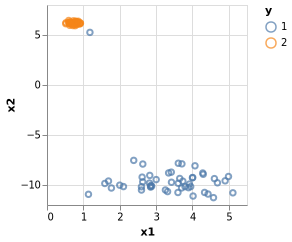

In [39]:
using VegaLite
dfBlobs |> @vlplot(:point, x=:x1, y=:x2, color = :"y:n") 

In [40]:
X = MLJ.Tables.matrix(X)
Y = float(Y)

100-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0
 2.0
 1.0
 2.0
 2.0
 2.0
 2.0
 1.0
 1.0
 2.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 2.0
 2.0
 1.0
 1.0
 1.0

In [46]:
svm_entity = svm.fit(svm.SVM(), X, Y)

Main.svm.SVM(0.001f0, 150, 0.0001f0, Main.svm.linear_kernel, [0.17236763807113265 0.10218059959455016 … 0.026307653165495583 0.15691207648398023], [0.8115707720910594], [0.6895805956141002 6.167227800812517; 0.7988236813464915 6.358416979430302; … ; 4.686924153189556 -9.780332523349673; 1.5901869940878108 -9.845956489403227])

In [47]:
res = svm.predict(svm_entity, X)

100×1 Matrix{Float64}:
 -342.2717759259607
 -345.75888109199934
 -352.42628155295193
 -351.50916904518635
 -320.1708335480109
  999.0639119501202
 -355.05041050027256
 -337.62397494612304
 -339.7397114551513
 -333.69727969267956
  893.6490485343052
  870.7854313556002
 -320.6100891801943
    ⋮
 1102.5087101507863
 1066.9875850051515
  960.7273617746354
  812.0358903149987
  815.9459801175218
  854.9803632254152
  960.5205049515353
 -355.43587718803917
 -334.6138010928536
  945.272364082721
 1015.1952737315007
  767.4915204547015

In [48]:
svm.get_accuracy(res, Y)

0.99